# **Emmanuella Anggi Siallagan - 2106678006**

# **ElasticSearch** ⚓

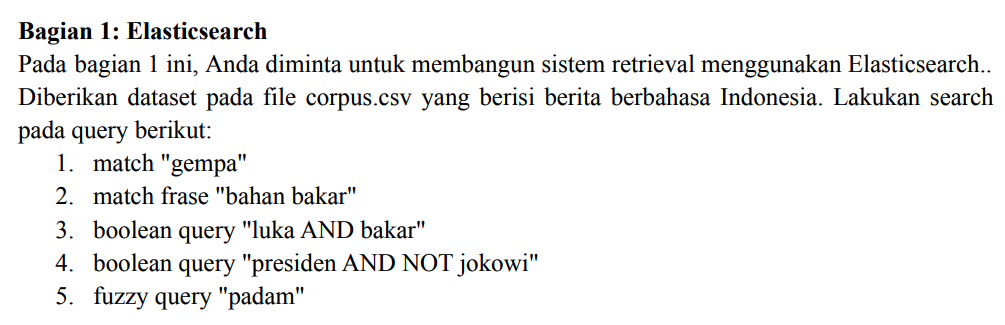

## **Instalasi, Konfigurasi, dan Environment ElasticSearch**

In [1]:
# Download library untuk define fungsi yang berhubungan dengan OS dan Load time
import os
import time

In [2]:
#  Download  Stack untuk ElasticSearch (ES)
%%bash

wget -q https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-oss-7.10.2-linux-x86_64.tar.gz
wget -q https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-oss-7.10.2-linux-x86_64.tar.gz.sha512

In [3]:
# Ekstraksi file Stack ES
!tar -xzf elasticsearch-oss-7.10.2-linux-x86_64.tar.gz

In [4]:
# Memulai servis ES pada latar belakang environtment

!sudo chown -R daemon:daemon elasticsearch-7.10.2

In [5]:
# SHA untuk artifak Stack yang diunduh

!shasum -a 512 elasticsearch-oss-7.10.2-linux-x86_64.tar.gz.sha512

d5d1a4189312b751759a826b093d4b3c16d5a2f9723af16d19269271ea7c297a8b7ddbb439cde85bfa7f988201363cc824bd2622d813092283e9894dc9e1c82a  elasticsearch-oss-7.10.2-linux-x86_64.tar.gz.sha512


In [6]:
# Reload konfigurasi systemd dan memulai service ES yang telah diunduh

%%bash --bg

sudo -H -u daemon elasticsearch-7.10.2/bin/elasticsearch

Starting job # 0 in a separate thread.


In [7]:
# untuk memastikan bahwa servis ES telah dimulai
time.sleep(20)

In [8]:
# Keterangan servis ES pada environment di Colab yang telah di-define
!ps -ef | grep elasticsearch

root         118     116  0 14:17 ?        00:00:00 sudo -H -u daemon elasticsearch-7.10.2/bin/elasticsearch
daemon       119     118 94 14:17 ?        00:00:18 /content/elasticsearch-7.10.2/jdk/bin/java -Xshare:auto -Des.networkaddress.cache.ttl=60 -Des.networkaddress.cache.negative.ttl=10 -XX:+AlwaysPreTouch -Xss1m -Djava.awt.headless=true -Dfile.encoding=UTF-8 -Djna.nosys=true -XX:-OmitStackTraceInFastThrow -XX:+ShowCodeDetailsInExceptionMessages -Dio.netty.noUnsafe=true -Dio.netty.noKeySetOptimization=true -Dio.netty.recycler.maxCapacityPerThread=0 -Dio.netty.allocator.numDirectArenas=0 -Dlog4j.shutdownHookEnabled=false -Dlog4j2.disable.jmx=true -Djava.locale.providers=SPI,COMPAT -Xms1g -Xmx1g -XX:+UseG1GC -XX:G1ReservePercent=25 -XX:InitiatingHeapOccupancyPercent=30 -Djava.io.tmpdir=/tmp/elasticsearch-243315452233063301 -XX:+HeapDumpOnOutOfMemoryError -XX:HeapDumpPath=data -XX:ErrorFile=logs/hs_err_pid%p.log -Xlog:gc*,gc+age=trace,safepoint:file=logs/gc.log:utctime,pid,tags:fileco

## **ElasticSearch with Dataset** ⛑

In [9]:
# Instal library ES
!pip3 install elasticsearch

     |████████████████████████████████| 378 kB 10.0 MB/s 
     |████████████████████████████████| 59 kB 6.2 MB/s 
     |████████████████████████████████| 138 kB 35.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [10]:
# Library untuk menkonversi index ES ke CSV 
!pip3 install --upgrade inelastic

     |████████████████████████████████| 83 kB 2.6 MB/s 
     |████████████████████████████████| 74 kB 4.0 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
  Created wheel for inelastic: filename=inelastic-0.2.4-py3-none-any.whl size=8820 sha256=3a5303393a929e2d78d209c7d38d93cb455974b618dc77329333052f2bf7cc49
  Stored in directory: /root/.cache/pip/wheels/1f/d6/a3/b23eecda1f08c92a872c79b1f197503687ab94939fbb2821dd
Successfully built inelastic
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstalling tqdm-4.64.0:
      Successfully uninstalled tqdm-4.64.0
  Attempting uninstall: elasticsearch
    Found existing installation: elasticsearch 8.2.0
    Uninstalling elasticsearch-8.2.0:
      Successfully uninstalled elasticsearch-8.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.

In [11]:
# Import dan membuka koneksi ES di Local Colab
from elasticsearch import Elasticsearch

es = Elasticsearch()

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [12]:
# Download dataset yang disediakan dari Google Drive
!gdown 10rrtjoWcahW1A52ME_jnbrVfcS_mf3kS

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Downloading...
From: https://drive.google.com/uc?id=10rrtjoWcahW1A52ME_jnbrVfcS_mf3kS
To: /content/corpus.csv
100% 1.38M/1.38M [00:00<00:00, 123MB/s]


In [13]:
# Import library Pandas untuk membuka file CSV yang diunduh
import pandas as pd

# Minimal Cleaning untuk Dataframe yang diberikan
def clean(message):
  mess = []
  message = message.replace('"', '')
  return message

# Membuka dataset
corpus_df = pd.read_csv('corpus.csv')
corpus_df["text_clean"] = corpus_df["text"].apply(lambda x: clean(x)) # Mengaplikasikan Cleaning

# Preview untuk dataframe yang telah dibuka dan dibersihkan
corpus_df.head()

,docid,source,section,date,title,text,text_clean
0,KPS-30062019-001,KOMPAS,INTERNASIONAL,30-06-2019,Serangan Bom Taliban Tewaskan 19 Orang di Afg...,Serangan bom yang menargetkan sebuah pusat dis...,Serangan bom yang menargetkan sebuah pusat dis...
1,KPS-30062019-002,KOMPAS,EDUKASI,30-06-2019,LLDikti Gelar Seleksi Kompetisi Debat Bahasa ...,Sebanyak 53 Universitas di wilayah DKI Jakarta...,Sebanyak 53 Universitas di wilayah DKI Jakarta...
2,KPS-30062019-003,KOMPAS,REGIONAL,30-06-2019,Foto dan Video Penganiayaan Anggota TNI di Ma...,Kepolisian Daerah (Polda) Sulawesi Utara mengi...,Kepolisian Daerah (Polda) Sulawesi Utara mengi...
3,KPS-30062019-004,KOMPAS,INTERNASIONAL,30-06-2019,"Menunggu Terlalu Lama, Presiden Brasil Batalk...",Presiden Brasil Jair Bolsonaro membatalkan age...,Presiden Brasil Jair Bolsonaro membatalkan age...
4,KPS-30062019-005,KOMPAS,REGIONAL,30-06-2019,"Pacitan KLB Hepatitis A, Penderitanya Hampir ...",Penderita Hepatitis A di kabupaten Pacitan Jaw...,Penderita Hepatitis A di kabupaten Pacitan Jaw...


In [14]:
# Mebuka index untuk menyimpan corpus dari dataset
%%bash

curl -X PUT "localhost:9200/corpus"

{"acknowledged":true,"shards_acknowledged":true,"index":"corpus"}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    65  100    65    0     0     76      0 --:--:-- --:--:-- --:--:--    76


In [15]:
# Import tqdm untuk loading pada indexing
from tqdm import tqdm

In [16]:
# Indexing pada setiap row dari dataframe
for index, row in tqdm(corpus_df.iterrows()):
  text = '{"text": "' + row['text_clean'] + '"}'
  es.index(index="corpus", doc_type="texts", id=index, body=text)

800it [00:09, 81.10it/s]


In [17]:
# Keterangan indexing pada setiap documents

%%bash
inelastic -i corpus -f text | column -t -s ,

term                           freq             doc_count  d0   d1   d2   d3   d4   d5   d6   d7   d8   d9   d10  d11  d12  d13  d14  d15  d16  d17  d18  d19  d20  d21  d22  d23  d24  d25  d26  d27  d28  d29  d30  d31  d32  d33  d34  d35  d36  d37  d38  d39  d40  d41  d42  d43  d44  d45  d46  d47  d48  d49  d50  d51  d52  d53  d54  d55  d56  d57  d58  d59  d60  d61  d62  d63  d64  d65  d66  d67  d68  d69  d70  d71  d72  d73  d74  d75  d76  d77  d78  d79  d80  d81  d82  d83  d84  d85  d86  d87  d88  d89  d90  d91  d92  d93  d94  d95  d96  d97  d98  d99  d100  d101  d102  d103  d104  d105  d106  d107  d108  d109  d110  d111  d112  d113  d114  d115  d116  d117  d118  d119  d120  d121  d122  d123  d124  d125  d126  d127  d128  d129  d130  d131  d132  d133  d134  d135  d136  d137  d138  d139  d140  d141  d142  d143  d144  d145  d146  d147  d148  d149  d150  d151  d152  d153  d154  d155  d156  d157  d158  d159  d160  d161  d162  d163  d164  d165  d166  d167  d168  d169  d170  d171  d172  d17

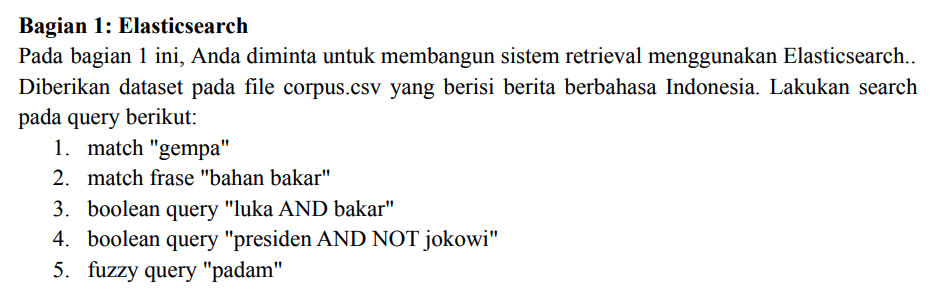

In [18]:
# 1. Match "gempa"

%%bash

curl -X GET 'localhost:9200/corpus/texts/_search?pretty' \
-H "Content-Type: application/json" -d '{"query": {
    "match": {
      "text": {
        "query": "gempa"
      }
    }
  }
}'

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


{
  "took" : 46,
  "timed_out" : false,
  "_shards" : {
    "total" : 1,
    "successful" : 1,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {
    "total" : {
      "value" : 11,
      "relation" : "eq"
    },
    "max_score" : 8.805777,
    "hits" : [
      {
        "_index" : "corpus",
        "_type" : "texts",
        "_id" : "529",
        "_score" : 8.805777,
        "_source" : {
          "text" : "Kepala Bidang Mitigasi Gempa Bumi Tsunami BMKG Daryono menyebutkan bahwa zona gempa di selatan Pulau Jawa sangat aktif.Hal tersebut terlihat dari seringnya terjadi gempa swarm atau gempa skala kecil yang tidak diakhiri dengan gempa utama.Salah satunya terjadi pada 3 Agustus 2019 lalu di Madiun yang tepatnya terjadi di lempeng Samudera Australia dari Bengkulu sampai Sumbawa.Ini adalah alarm, mengingatkan kita bahwa zona gempa di selatan Pulau Jawa sangat aktif, ujar Daryono saat konferensi pers di Kantor BNPB, Jakarta Timur, Jumat (30/8/2019).Suatu saat nanti kita bisa jumpai g

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17770  100 17683  100    87   253k   1279 --:--:-- --:--:-- --:--:--  255k


In [19]:
# 2. Match frase "bahan bakar"

%%bash

curl -X GET 'localhost:9200/corpus/texts/_search?pretty' \
-H "Content-Type: application/json" -d '{
  "query": {
    "match": {
      "text": {
        "query": "bahan bakar"
      }
    }
  }
}'

{
  "took" : 41,
  "timed_out" : false,
  "_shards" : {
    "total" : 1,
    "successful" : 1,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {
    "total" : {
      "value" : 44,
      "relation" : "eq"
    },
    "max_score" : 11.3438,
    "hits" : [
      {
        "_index" : "corpus",
        "_type" : "texts",
        "_id" : "227",
        "_score" : 11.3438,
        "_source" : {
          "text" : "Wakil Presiden Jusuf Kalla meminta PT PLN dan swasta melirik investasi pembangunan pembangkit listrik dari energi terbarukan.Wapres mengatakan, Indonesia sangat membutuhkan listrik yang bersumber dari energi terbarukan.Sebab, saat ini harga bahan bakar fosil untuk menghasilkan listrik terus merangkak naik.Selain itu, ketersediaan bahan bakar fosil sangat bergantung pada geopolitik internasional sehingga sewaktu-waktu bisa terjadi kelangkaan.Karena itulah maka kebijakan energi terbarukan ini menjadi penting. Supaya ada suatu energy security. Kenapa renewable energy menjadi energy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17647  100 17551  100    96   323k   1811 --:--:-- --:--:-- --:--:--  325k


In [20]:
%%bash

# 3. Boolean query "luka AND bakar"

curl -X GET 'localhost:9200/corpus/texts/_search?pretty' -H 'Content-Type: application/json' -d '
{
  "query": {
    "bool": {
      "must": [
        {"term": {"text": "luka"}},
        {"term": {"text": "bakar"}}
      ]
    }
  }
}
'

{
  "took" : 21,
  "timed_out" : false,
  "_shards" : {
    "total" : 1,
    "successful" : 1,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {
    "total" : {
      "value" : 14,
      "relation" : "eq"
    },
    "max_score" : 11.508842,
    "hits" : [
      {
        "_index" : "corpus",
        "_type" : "texts",
        "_id" : "566",
        "_score" : 11.508842,
        "_source" : {
          "text" : "HP (60), pria yang tewas dalam mobil di Rawalumbu, Bekasi, Kamis (29/8/2019), tak mengalami luka bakar di sekujur tubuh.Punggungnya saja yang mengalami luka bakar, tidak seluruh tubuh. Kaki masih bagus juga semuanya, ujar Wakapolres Metro Bekasi Kota, AKBP Eka Mulyana dalam konferensi pers, Jumat (30/8/2019).Ria, istri korban, membenarkan hal itu ketika Kompas.com menemuinya di kediamannya, Jumat.Dengkul hanya ada patah, keluar darah, kata Ria.Dari foto di lokasi kejadian yang diterima Kompas.com, tampak wajah korban memang mengalami luka bakar.Korban ditemukan dalam posisi 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17210  100 17072  100   138   378k   3136 --:--:-- --:--:-- --:--:--  373k


In [21]:
# 4. Boolean query "presiden AND NOT jokowi"

%%bash

curl -X GET  'localhost:9200/corpus/texts/_search?pretty' -H 'Content-Type: application/json' -d '
{
  "query": {
    "bool": {
      "must": [
        {"term": {"text": "presiden"}}
      ],
      "must_not": [
        {"term": {"text": "jokowi"}}
      ]
    }
  }
}
'

{
  "took" : 12,
  "timed_out" : false,
  "_shards" : {
    "total" : 1,
    "successful" : 1,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {
    "total" : {
      "value" : 73,
      "relation" : "eq"
    },
    "max_score" : 3.4007792,
    "hits" : [
      {
        "_index" : "corpus",
        "_type" : "texts",
        "_id" : "46",
        "_score" : 3.4007792,
        "_source" : {
          "text" : "Juru bicara Direktorat Advokasi Badan Pemenangan Nasional (BPN) Prabowo-Sandi, Habiburokhman, hadir dalam rapat pleno terbuka penetapan pasangan calon presiden dan wakil presiden terpilih Pemilu 2019.Habiburokhman mewakili Prabowo-Sandi yang tak hadir dalam acara tersebut.Ia juga mewakili paslon nomor urut 02 itu menerima salinan surat keputusan (SK) KPU tentang penetapam calon presiden dan wakil presiden terpilih.Salinan SK diserahkan oleh Ketua KPU Arief Budiman. Setelahnya, keenam Komisioner KPU menyalami Habiburokhman.Sambil tersenyum, Habiburokhman kemudian menyalami Jok

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18357  100 18186  100   171   612k   5896 --:--:-- --:--:-- --:--:--  618k


In [22]:
# 5. Fuzzy query "padam"

%%bash

curl -X GET 'localhost:9200/corpus/texts/_search?pretty'  \
-H "Content-Type: application/json" -d '{
  "query": {
    "match": {
      "text": {
        "query": "padam",
        "fuzziness": "AUTO"
      }
    }
  }
}'

{
  "took" : 55,
  "timed_out" : false,
  "_shards" : {
    "total" : 1,
    "successful" : 1,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {
    "total" : {
      "value" : 477,
      "relation" : "eq"
    },
    "max_score" : 1.2630637,
    "hits" : [
      {
        "_index" : "corpus",
        "_type" : "texts",
        "_id" : "681",
        "_score" : 1.2630637,
        "_source" : {
          "text" : "Sebuah rumah dua lantai di Kavling Agraria, RT 01, RW 016, Kelurahan Duren Sawit, Kecamatan Duren Sawit, Jakarta Timur hangus terbakar, Jumat (30/8/2019).Kepala Seksi Operasional Suku Dinas Penanggulangan Kebakaran dan Penyelamatan (Sudin PKP) Jakarta Timur Gatot Sulaeman mengatakan, kebakaran terjadi sekitar pukul 06.25 WIB.Sebanyak tujuh unit mobil pemadam kebakaran diterjunkan untuk memadamkan api.Kebakaran di rumah tinggal di Duren Sawit, tujuh unit kita turunkan. Alhamdulillah sudah padam sekitar pukul 07.20 WIB, kata Gatot saat dikonfirmasi wartawan, Jumat.Adapun keba

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16124  100 16005  100   119   223k   1700 --:--:-- --:--:-- --:--:--  224k


# **Haystack** ☄

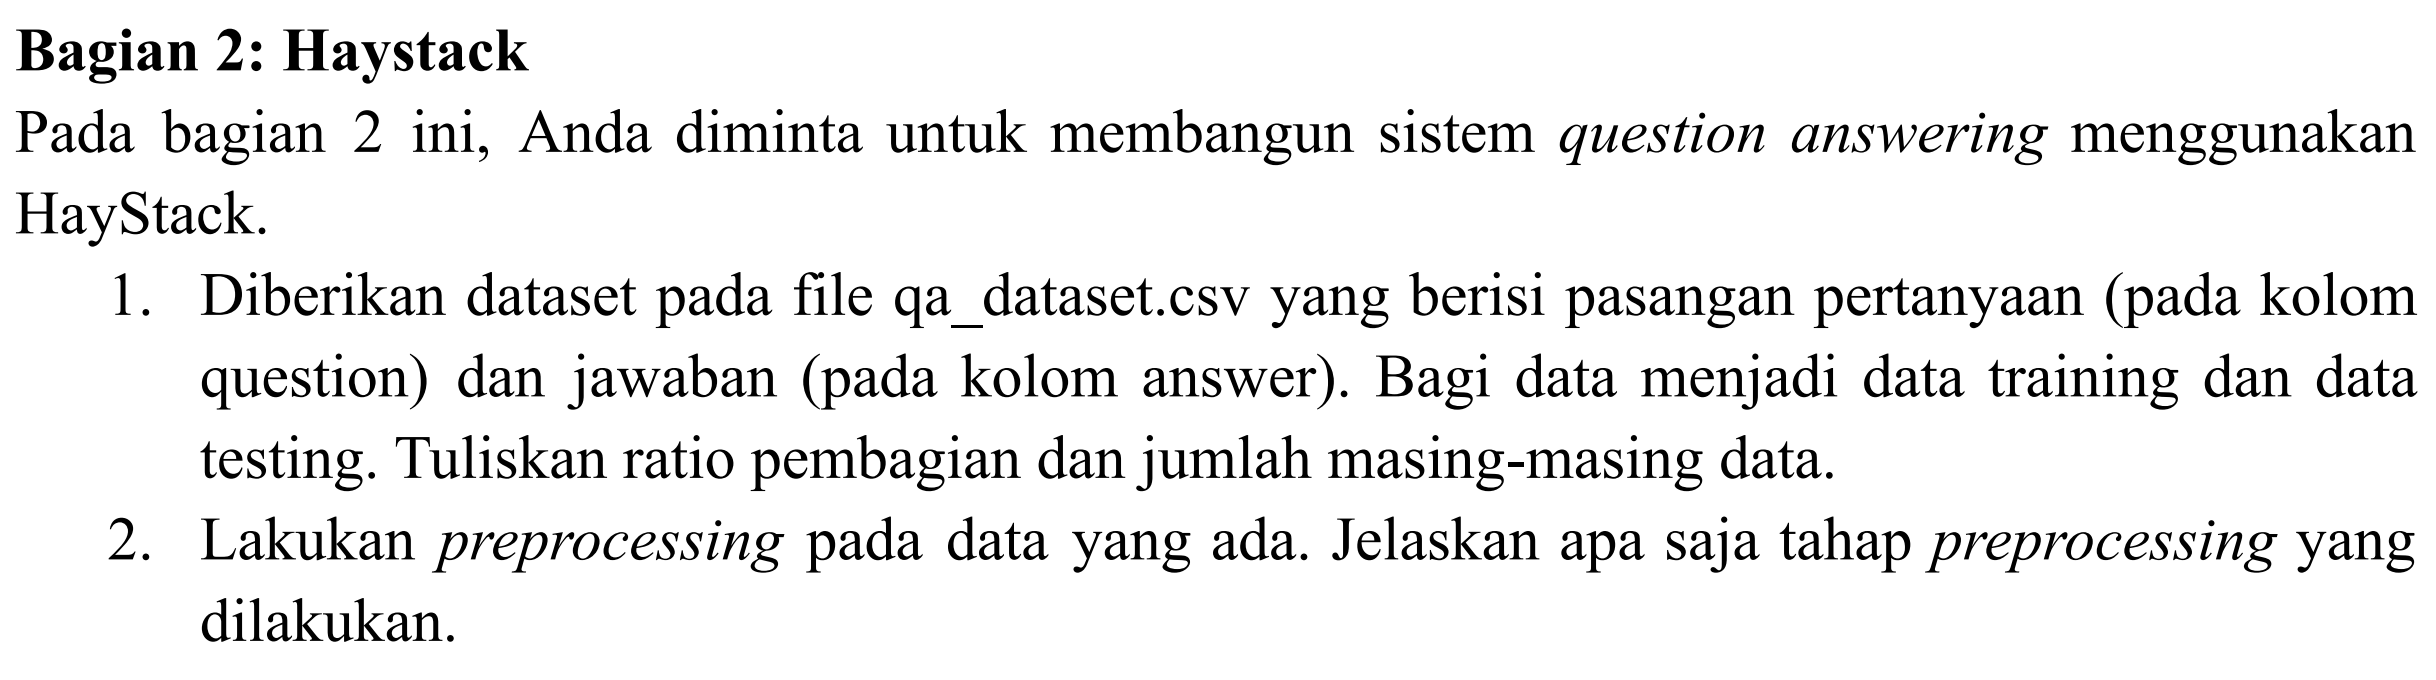

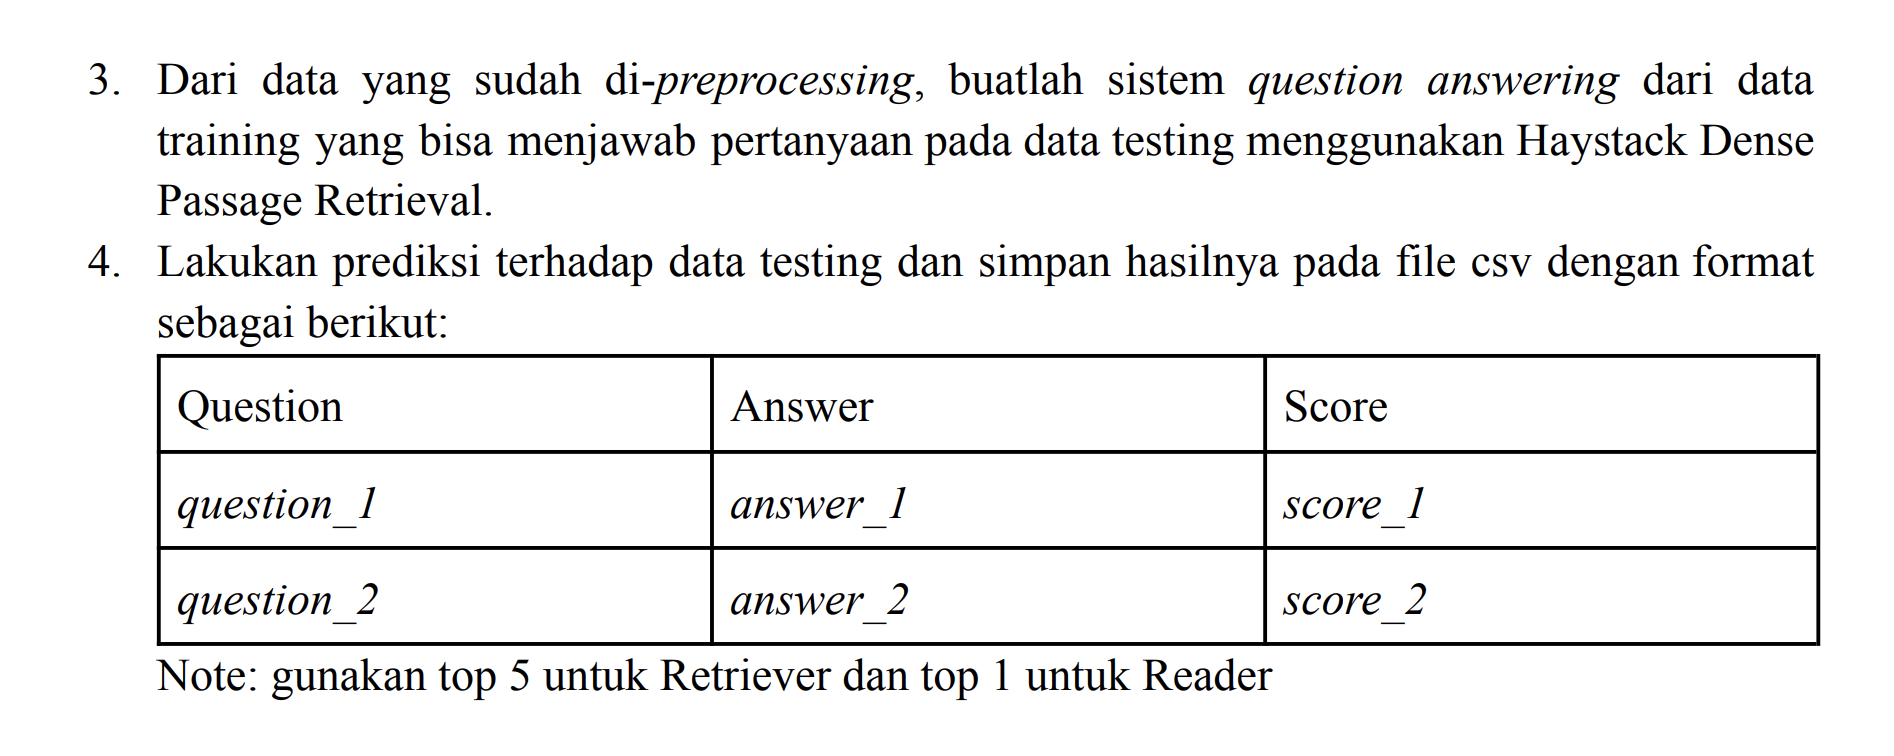

In [1]:
#Melakukan cek pada GPU yang berjalan pada environment Colab
!nvidia-smi

Tue May 17 14:29:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Instalasi Hasytack pada lokal environment 
#dari direktori master pada repositori Github Haystack

!pip install --upgrade pip
!pip install git+https://github.com/deepset-ai/haystack.git#egg=farm-haystack[colab,faiss]

     |████████████████████████████████| 2.1 MB 8.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
  Cloning https://github.com/deepset-ai/haystack.git to /tmp/pip-install-40q5zyzj/farm-haystack_b7e1e79ca3a34510bc51d646276cf8eb
  Running command git clone --filter=blob:none --quiet https://github.com/deepset-ai/haystack.git /tmp/pip-install-40q5zyzj/farm-haystack_b7e1e79ca3a34510bc51d646276cf8eb
  Resolved https://github.com/deepset-ai/haystack.git to commit 5a1e98e3ff6f30faba06c8d7dc337158ab6fc4a0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.5 MB/s eta 0:00:00
  Preparing metada

In [3]:
#Import library dan function Haystack pada notebook

#Import function untuk mendapatkan, membersihkan, dan menampilkan data
from haystack.utils import clean_wiki_text, convert_files_to_docs, fetch_archive_from_http, print_answers

#Import nodes dari Haystack beserta Reader untuk membaca Indexing yang akan dihasilkan
from haystack.nodes import FARMReader, TransformersReader

INFO - haystack.modeling.model.optimization -  apex not found, won't use it. See https://nvidia.github.io/apex/
ERROR - root -  Failed to import 'magic' (from 'python-magic' and 'python-magic-bin' on Windows). FileTypeClassifier will not perform mimetype detection on extensionless files. Please make sure the necessary OS libraries are installed if you need this functionality.


In [4]:
#Import dan menggunakan library untuk storing document yang digunakan sebagai dataset
from haystack.document_stores import FAISSDocumentStore

document_store = FAISSDocumentStore(faiss_index_factory_str="Flat")

INFO - haystack.telemetry -  Haystack sends anonymous usage data to understand the actual usage and steer dev efforts towards features that are most meaningful to users. You can opt-out at anytime by calling disable_telemetry() or by manually setting the environment variable HAYSTACK_TELEMETRY_ENABLED as described for different operating systems on the documentation page. More information at https://haystack.deepset.ai/guides/telemetry


In [5]:
# Download dataset CSV dari Google Drive
! gdown 1nUitHxjrTn_nIECb4PMV-mahmlVtkdvz

Downloading...
From: https://drive.google.com/uc?id=1nUitHxjrTn_nIECb4PMV-mahmlVtkdvz
To: /content/qa_dataset.csv
100% 76.0M/76.0M [00:00<00:00, 140MB/s]


In [6]:
#Import Library pandas untuk menggunakan dataset format CSV
import pandas as pd
df = pd.read_csv("/content/qa_dataset.csv")

#Melakukan minimal cleaning dari dataset yang diunduh
df.fillna(value="", inplace=True)
df["question"] = df["question"].apply(lambda x: x.strip())

#Mendapatkan embeddings untuk pertanyaan dari dataset FAQ
questions = list(df["question"].values)
df = df.rename(columns={"question": "content"})

In [7]:
#Membagi dataset menjadi set Train dan Test, Test set sebesar 0.05 dari keseluruhan dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.05)

In [8]:
#Mengubah bentuk dataframe ke bentuk list dari dictionary dan membentuk 
#indexing pada DocumentStore yang telah di-define
docs_to_index = train.to_dict(orient="records")
document_store.write_documents(docs_to_index)

Writing Documents:   0%|          | 0/82479 [00:00<?, ?it/s]

In [9]:
#Import library dan function untuk menggunakan Dense Passage Restriever (DPR)
from haystack.nodes import DensePassageRetriever

retriever = DensePassageRetriever(
    document_store=document_store,
    query_embedding_model="facebook/dpr-question_encoder-single-nq-base",
    passage_embedding_model="facebook/dpr-ctx_encoder-single-nq-base",
    max_seq_len_query=64,
    max_seq_len_passage=256,
    batch_size=16,
    use_gpu=True,
    embed_title=True,
    use_fast_tokenizers=True,
)

#Melakukan update pada embeddings yang telah dibentuk dengan DPR
document_store.update_embeddings(retriever)

INFO - haystack.modeling.utils -  Using devices: CUDA:0
INFO - haystack.modeling.utils -  Number of GPUs: 1


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/493 [00:00<?, ?B/s]

INFO - haystack.modeling.model.language_model -  LOADING MODEL
INFO - haystack.modeling.model.language_model -  =============
INFO - haystack.modeling.model.language_model -  Could not find facebook/dpr-question_encoder-single-nq-base locally.
INFO - haystack.modeling.model.language_model -  Looking on Transformers Model Hub (in local cache and online)...


Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

INFO - haystack.modeling.model.language_model -  Loaded facebook/dpr-question_encoder-single-nq-base


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizerFast'.
INFO - haystack.modeling.model.language_model -  LOADING MODEL
INFO - haystack.modeling.model.language_model -  =============
INFO - haystack.modeling.model.language_model -  Could not find facebook/dpr-ctx_encoder-single-nq-base locally.
INFO - haystack.modeling.model.language_model -  Looking on Transformers Model Hub (in local cache and online)...


Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

INFO - haystack.modeling.model.language_model -  Loaded facebook/dpr-ctx_encoder-single-nq-base
INFO - haystack.document_stores.faiss -  Updating embeddings for 82479 docs...


Updating Embedding:   0%|          | 0/82479 [00:00<?, ? docs/s]

Create embeddings:   0%|          | 0/10000 [00:00<?, ? Docs/s]

Create embeddings:   0%|          | 0/10000 [00:00<?, ? Docs/s]

Create embeddings:   0%|          | 0/10000 [00:00<?, ? Docs/s]

Create embeddings:   0%|          | 0/10000 [00:00<?, ? Docs/s]

Create embeddings:   0%|          | 0/10000 [00:00<?, ? Docs/s]

Create embeddings:   0%|          | 0/10000 [00:00<?, ? Docs/s]

Create embeddings:   0%|          | 0/10000 [00:00<?, ? Docs/s]

Create embeddings:   0%|          | 0/10000 [00:00<?, ? Docs/s]

Create embeddings:   0%|          | 0/2480 [00:00<?, ? Docs/s]

In [10]:
#Load model yang telah dibentuk dengan FARMReader dengan Deepset Roberta
reader = FARMReader(model_name_or_path="deepset/roberta-base-squad2", use_gpu=True)

INFO - haystack.modeling.utils -  Using devices: CUDA:0
INFO - haystack.modeling.utils -  Number of GPUs: 1
INFO - haystack.modeling.model.language_model -  LOADING MODEL
INFO - haystack.modeling.model.language_model -  =============
INFO - haystack.modeling.model.language_model -  Could not find deepset/roberta-base-squad2 locally.
INFO - haystack.modeling.model.language_model -  Looking on Transformers Model Hub (in local cache and online)...


Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/473M [00:00<?, ?B/s]

INFO - haystack.modeling.model.language_model -  Loaded deepset/roberta-base-squad2


Downloading:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

INFO - haystack.modeling.utils -  Using devices: CUDA
INFO - haystack.modeling.utils -  Number of GPUs: 1
INFO - haystack.modeling.infer -  Got ya 2 parallel workers to do inference ...
INFO - haystack.modeling.infer -   0     0  
INFO - haystack.modeling.infer -  /w\   /w\ 
INFO - haystack.modeling.infer -  /'\   / \ 


In [11]:
#Import dan menggunakan function untuk Pipeline model Reader dan Retriever pada sistem QA
from haystack.pipelines import ExtractiveQAPipeline
pipe = ExtractiveQAPipeline(reader, retriever)

In [12]:
#Melakukan prediksi pada set Test
df_result = pd.DataFrame(columns=["question", "answer", "score"])

#Melakukan prediksi pada setiap row pada dataset Test
for a , _ in test.iterrows():
  prediction = pipe.run(query= test["context"][a], params={"Retriever": {"top_k": 5}, "Reader": {"top_k": 5}})
  for b in range(len(prediction["answers"])):
    df_result = df_result.append({'question': test["context"][a], 
                               'answer': prediction["answers"][b].answer, 
                               'score': prediction["answers"][b].score}, ignore_index=True)

Streaming output truncated to the last 5000 lines.
Inferencing Samples: 100%|██████████| 1/1 [00:00<00:00, 66.64 Batches/s]


In [13]:
#Preview untuk dataframe prediksi yang telah dibentuk
df_result 

,question,answer,score
0,"Like other common colors, green has several completely opposite associations...",green,0.003471
1,"Like other common colors, green has several completely opposite associations...",cloron,0.000809
2,"Like other common colors, green has several completely opposite associations...","In the Middle Ages, which color was associated with merchants, bankers, and ...",0.000052
3,"Like other common colors, green has several completely opposite associations...",What color,0.000033
4,"Like other common colors, green has several completely opposite associations...",what century,0.000019
...,...,...,...
21705,"Beyoncé's second solo album B'Day was released on September 5, 2006, in the ...",three,0.174397
21706,"Beyoncé's second solo album B'Day was released on September 5, 2006, in the ...",Beyonce,0.022306
21707,"Beyoncé's second solo album B'Day was released on September 5, 2006, in the ...",Jay Z,0.010041
21708,"Beyoncé's second solo album B'Day was released on September 5, 2006, in the ...",Beyonce,0.003464


In [17]:
df_result.score.mean()

0.01186457704136395

In [18]:
df_result.score.max()

0.8323510885238647

In [26]:
df_result.groupby("question").max().mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


score    0.045251
dtype: float64

In [21]:
df_result.groupby("question").mean().max()

score    0.334617
dtype: float64

In [24]:
df_result.groupby("question").mean().min()

score    0.000038
dtype: float64

In [14]:
#Menyimpan dataframe yang telah dibentuk ke dalam ekstensi CSV
df_result.to_csv("Tugas2_bagian2_216678006.csv") 